## 2 - Data Analysis

### Lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Vars

In [2]:
csv_url = "../../storage/datas/csv/clean/cleaned_dataset_with_features_and_dimensions.csv"
cleaned_dataset = pd.read_csv(csv_url, low_memory=False)

### Part 1 - Dataset informations

In [3]:
print('Unique observed species :')
print(cleaned_dataset['species'].nunique())

print('\n Label repartition by % :')
print('\n', (cleaned_dataset['label'].value_counts(normalize = True)*100).round(2))

Unique observed species :
8331

 Label repartition by % :

 label
Trametes versicolor         0.43
Pleurotus ostreatus         0.40
Psilocybe zapotecorum       0.37
Psilocybe cyanescens        0.34
Hypholoma fasciculare       0.33
                            ... 
Echinoderma perplexum       0.00
Russula monspeliensis       0.00
Cortinarius assiduus        0.00
Hygrophorus piceae group    0.00
Rhizocybe vermicularis      0.00
Name: proportion, Length: 9165, dtype: float64


In [4]:
def displayDataframeInformations(df:pd.DataFrame) -> None:
    """
    Display various information about the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to display information for.

    Returns:
    None
    """

    print(df.head)

    print("\n*********************\n")
    print("Classification repartition:")
    print("phylum:",df['phylum'].nunique())
    print("class:",df['class'].nunique())
    print("order:",df['order'].nunique())
    print("family:",df['family'].nunique())
    print("genus:",df['genus'].nunique())
    print("species:",df['species'].nunique())

    print("\n*********************\n")
    dataset_observation_count = df.shape[0]
    print(f"Observation count: {dataset_observation_count}")

    dataset_columns = df.columns.tolist()
    dataset_column_nb = len(dataset_columns)
    print(f"Column count: {dataset_column_nb}")
    print(f"Columns: \n {dataset_columns}")

    dataset_duplicates_nb = df.duplicated().sum()
    print(f"Number of duplicates: {dataset_duplicates_nb}")

    dataset_null_values = df.isnull().sum().to_frame().reset_index()
    dataset_null_values.columns = ['Column', 'Null Values']
    print(dataset_null_values)

displayDataframeInformations(cleaned_dataset)

<bound method NDFrame.head of         image_lien                    label       family         phylum  \
0            1.jpg       Xylaria polymorpha  Xylariaceae     Ascomycota   
1            2.jpg        Xylaria magnoliae  Xylariaceae     Ascomycota   
2            3.jpg        Xylaria hypoxylon  Xylariaceae     Ascomycota   
3            4.jpg        Xylaria hypoxylon  Xylariaceae     Ascomycota   
4            6.jpg  Xeromphalina campanella   Mycenaceae  Basidiomycota   
...            ...                      ...          ...            ...   
365247  673202.jpg      Hericium americanum  Hericiaceae  Basidiomycota   
365248  673203.jpg      Hericium americanum  Hericiaceae  Basidiomycota   
365249  673196.jpg    Calvatia cyathiformis  Agaricaceae  Basidiomycota   
365250  673197.jpg    Calvatia cyathiformis  Agaricaceae  Basidiomycota   
365251  673198.jpg    Calvatia cyathiformis  Agaricaceae  Basidiomycota   

                        species            canonicalName            c

### Part 2 - Data visualization

In [5]:
def displayCharts(df,num_unique_values:dict) -> None:
    """
    Display charts for analyzing the given DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be analyzed.

    Returns:
    None
    """

    def create_subplot(df, column, ax, num):
        """
        Create a subplot for visualizing the count of observations in a column of a DataFrame.

        Parameters:
        - df (pandas.DataFrame): The DataFrame containing the data.
        - column (str): The name of the column to visualize.
        - ax (matplotlib.axes.Axes): The subplot to plot on.
        - num (int): The number of unique values to consider.

        Returns:
        None
        """
        # Get the most frequent values and filter the dataset
        top_values = df[column].value_counts().index[:num]
        filtered_dataset = df[df[column].isin(top_values)]

        # Plot the count of observations for each value
        sns.countplot(data=filtered_dataset,
                      x=column,
                      hue=column,
                      order=filtered_dataset[column].value_counts().index,
                      palette='deep',
                      legend=False,
                      ax=ax)
        ax.set_title(column.capitalize())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_ylabel("Observations")

        if column != 'species':
            ax.set_yscale("log")




    # Define the number of unique values to consider for each column
    columns = num_unique_values.keys()
    fig, axs = plt.subplots(len(columns), 1, figsize=(20, 12*len(columns)))

    
    # Create a subplot for each value to visualize
    for ax, column in zip(axs, columns):
        create_subplot(df, column, ax, num_unique_values[column])
    

    # Display the plots
    plt.tight_layout()
    plt.show();

/tmp/ipykernel_25022/3468427494.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_25022/3468427494.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_25022/3468427494.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_25022/3468427494.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_25022/3468427494.py:38: UserWarning: set_ticklabels() should only be used with a fixed number

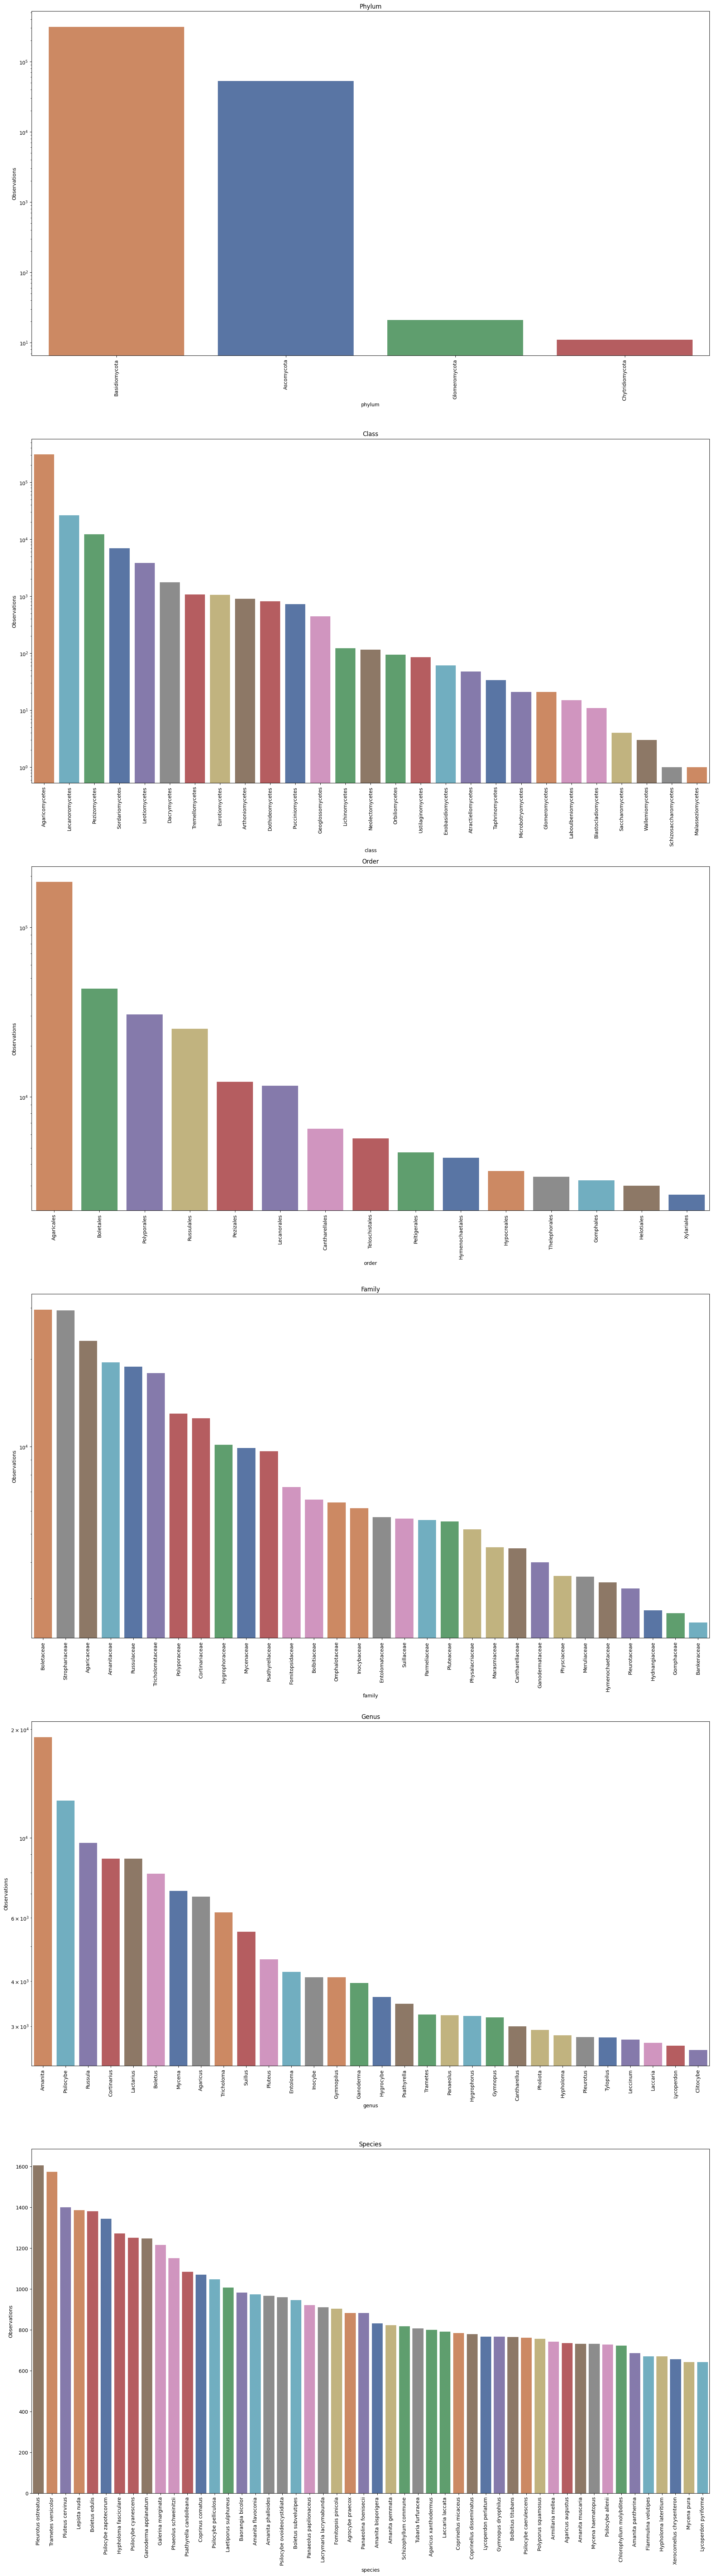

In [6]:
num_unique_values = {'phylum': None, 'class': None, 'order': 15, 'family': 30, 'genus': 30, 'species': 50}
displayCharts(cleaned_dataset, num_unique_values)